<a href="https://colab.research.google.com/github/raphaelfsg/Data_Science/blob/main/Atividade_07_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividades - Encontro 07/07

Para as atividades de hoje, você vai precisar gerar um dataset contendo dados educacionais de uma amostra aleatória de mil municípios a partir do Google BigQuery.

Utilize a Query abaixo e importe o CSV resultante no ambiente do Colab/Deepnote.

`SELECT * FROM basedosdados.br_inep_ideb.escola WHERE ano=2019 AND nota_saeb_matematica IS NOT NULL AND anos_escolares = 'iniciais (1-5)' ORDER BY RAND() LIMIT 1000;`

Este dataset contém a média das notas de alunos do Sistema de Avaliação da Educação Básica (SAEB) por município, o ìndice de Desenvolvimento da Educação Básica (IDEB) do município, entre outras informações relacionadas. Para mais detalhes podem consultar o dicionário de dados no site da [Base dos Dados](https://basedosdados.org/dataset/br-inep-ideb?bdm_table=escola).

Note que estamos trabalhando apenas com o ano de 2019.

### Atividade 1: Gerando Estatísticas Descritivas

In [ ]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np
import plotly.express as px

Importe o arquivo CSV em Pandas

In [ ]:
# código
df = pd.read_csv('/content/bquxjob_4d3972fe_181daf7ddb7.csv', sep=",")
df.describe()

,ano,id_municipio,id_escola,taxa_aprovacao,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb,projecao
count,1000.0,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,953.000000
mean,2019.0,3.105748e+06,3.103784e+07,94.160400,0.940847,219.935400,206.330330,5.912934,5.588600,5.511438
std,0.0,1.005270e+06,1.002122e+07,6.167761,0.063168,26.562106,24.957734,0.945611,1.089926,0.900435
min,2019.0,1.100031e+06,1.100300e+07,62.300000,0.578199,140.990000,127.290000,2.969065,2.400000,2.500000
25%,2019.0,2.311479e+06,2.325259e+07,91.500000,0.912822,202.145000,190.232500,5.276832,4.900000,4.900000
50%,2019.0,3.124154e+06,3.108452e+07,96.000000,0.961329,218.865000,207.930000,5.935350,5.600000,5.500000
75%,2019.0,3.550605e+06,3.543126e+07,98.800000,0.988724,239.360000,224.350000,6.581396,6.400000,6.200000
max,2019.0,5.300108e+06,5.301274e+07,100.000000,1.000000,306.920000,278.230000,8.821314,8.400000,7.900000


Gere uma tabela descritiva dos dados e compare medidas de tendência central, dispersão e quartis entre diferentes estados brasileiros para o valor do IDEB.

Dica: Crie diferentes dataframes com as medidas usando 'groupby' e em seguida integre todas as colunas em um novo DataFrame. No final, você pode ordenar por IDEB (do maior para o menor).

In [ ]:
# código
media_uf = df.groupby('sigla_uf')['ideb']


In [ ]:
ideb_desc = pd.DataFrame()

In [ ]:
ideb_desc['media'] = media_uf.mean()

In [ ]:
ideb_desc['desvio'] = media_uf.std()
ideb_desc['q1'] = media_uf.quantile(0.25)
ideb_desc['mediana'] = media_uf.median()
ideb_desc['q3'] = media_uf.quantile(0.75)
ideb_desc['Variancia'] = media_uf.var()
ideb_desc['media'].sort_values()

ideb_desc

,media,desvio,q1,mediana,q3,Variancia
sigla_uf,,,,,,
AC,5.725000,1.369611,5.075,5.70,6.350,1.875833
AL,5.264000,0.847978,4.700,5.30,5.900,0.719067
AM,4.964706,1.118001,4.400,5.00,5.200,1.249926
AP,4.512500,0.635694,4.500,4.70,4.750,0.404107
BA,4.774359,0.993673,4.100,4.60,5.375,0.987386
CE,6.202000,0.781806,5.625,6.10,6.675,0.611220
DF,5.972727,0.529322,5.550,6.00,6.300,0.280182
ES,6.104545,0.747999,5.600,6.05,6.675,0.559502
GO,6.031034,0.686140,5.400,6.00,6.300,0.470788


Gere uma tabulação cruzada contendo a média das notas do IDEB, para diferentes estados e tipo de escola (municipal ou estadual).

Utilize apenas os seguintes estados na análise: MG, RS e SP (rode o código abaixo para filtrar a base de dados).

In [ ]:
df_filtrado = df[(df['sigla_uf'] =='MG') | (df['sigla_uf'] == 'SP') | (df['sigla_uf'] == 'RS')]
df_filtrado

,ano,sigla_uf,id_municipio,id_escola,rede,ensino,anos_escolares,taxa_aprovacao,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb,projecao
0,2019,SP,3538709,35021180,estadual,fundamental,iniciais (1-5),99.2,0.991278,268.04,238.69,7.419320,7.4,7.3
1,2019,RS,4314050,43178286,municipal,fundamental,iniciais (1-5),92.1,0.913181,243.66,240.97,6.995325,6.4,6.7
7,2019,MG,3143906,31223484,municipal,fundamental,iniciais (1-5),97.6,0.977541,253.27,235.00,7.070368,6.9,7.1
8,2019,SP,3528809,35062583,municipal,fundamental,iniciais (1-5),100.0,1.000000,218.72,205.41,5.873017,5.9,6.0
11,2019,SP,3551009,35056492,municipal,fundamental,iniciais (1-5),93.6,0.931646,221.86,213.58,6.081668,5.7,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,2019,MG,3130200,31037818,municipal,fundamental,iniciais (1-5),100.0,1.000000,247.10,235.22,6.956429,7.0,6.8
981,2019,MG,3162922,31231291,estadual,fundamental,iniciais (1-5),100.0,1.000000,226.86,209.99,6.111442,6.1,6.2
983,2019,SP,3522307,35219149,municipal,fundamental,iniciais (1-5),98.3,0.986733,201.88,181.03,5.108552,5.0,5.3
996,2019,MG,3162104,31324817,municipal,fundamental,iniciais (1-5),99.5,0.994898,238.80,217.63,6.478396,6.4,6.6


In [ ]:
# código
cruzada = pd.crosstab(index=df_filtrado['sigla_uf'], columns=df_filtrado['rede'], values=df_filtrado['ideb'], aggfunc=np.average, margins=True)

cruzada

rede,estadual,municipal,All
sigla_uf,,,
MG,6.335484,6.240984,6.272826
RS,5.933333,5.990323,5.962295
SP,6.820000,6.426136,6.513274
All,6.336047,6.288333,6.303759


# Atividade 2: Outliers



Gere um boxplot para cada uma das variáveis a seguir e observe graficamente se há outliers: `taxa_aprovacao`, `indicador_rendimento`, `nota_saeb_matematica`, `nota_saeb_lingua_portuguesa`, `nota_saeb_media_padronizada`, `ideb`.

Se houver outlier, calcule o intervalo interquartil e a partir deste obtenha quais são os municípios outliers.


Dicas:

1) Você pode utilizar tanto a biblioteca Seaborn quando a Plotly Express;

2) O intervalo interquartil é calculo por $Q3-Q1$

**Taxa Aprovação**

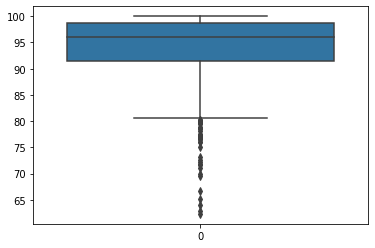

In [ ]:
# Boxplot
sns.boxplot(data=df.taxa_aprovacao)

In [ ]:
# Limites a partir do intervalo interquartílico
q1 = df.taxa_aprovacao.quantile(0.25)
q3 = df.taxa_aprovacao.quantile(0.75)
IQ = q3 - q1
lim_sup = q3 + 1.5 * IQ
lim_inf = q1 - 1.5 * IQ

In [ ]:
# Recorte do Dataframe para compreender os outliers
outlier = df[(df.taxa_aprovacao < lim_inf) | (df.taxa_aprovacao > lim_sup)]
outlier

,ano,sigla_uf,id_municipio,id_escola,rede,ensino,anos_escolares,taxa_aprovacao,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb,projecao
81,2019,PA,1503606,15102041,municipal,fundamental,iniciais (1-5),76.6,0.777101,203.78,196.75,5.430629,4.2,4.7
92,2019,PA,1508050,15572668,municipal,fundamental,iniciais (1-5),78.4,0.747137,178.16,173.08,4.511334,3.4,5.0
100,2019,SP,3510906,35216549,municipal,fundamental,iniciais (1-5),77.5,0.775000,216.86,196.21,5.670248,4.4,6.7
113,2019,SE,2805802,28012496,municipal,fundamental,iniciais (1-5),76.7,0.805870,179.19,158.27,4.261718,3.4,3.8
122,2019,RJ,3306107,33035890,municipal,fundamental,iniciais (1-5),62.3,0.635862,201.30,193.72,5.328210,3.4,5.6
126,2019,SE,2805406,28002296,municipal,fundamental,iniciais (1-5),66.7,0.672185,160.38,142.27,3.611658,2.4,NaN
130,2019,BA,2904902,29162823,municipal,fundamental,iniciais (1-5),72.2,0.738558,171.53,157.77,4.106444,3.0,3.8
168,2019,SE,2801108,28012941,municipal,fundamental,iniciais (1-5),71.1,0.726251,155.58,146.33,3.593864,2.6,3.7
175,2019,BA,2923050,29375657,municipal,fundamental,iniciais (1-5),76.7,0.748809,204.52,204.91,5.592743,4.2,4.2
186,2019,PI,2203255,22021795,municipal,fundamental,iniciais (1-5),76.8,0.733320,177.57,165.86,4.368611,3.2,4.1


**Indicador Rendimento**

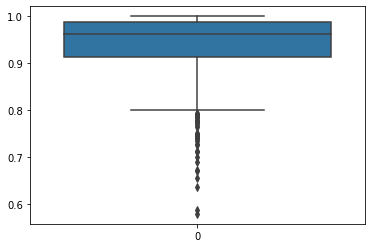

In [ ]:
# Boxplot
sns.boxplot(data= df.indicador_rendimento)

In [ ]:
# Limites a partir do intervalo interquartílico
q1 = df.indicador_rendimento.quantile(0.25)
q3 = df.indicador_rendimento.quantile(0.75)
IQ = q3 - q1
lim_sup = q3 + 1.5 * IQ
lim_inf = q1 - 1.5 * IQ

In [ ]:
# Recorte do Dataframe para compreender os outliers
outlier = df[(df.indicador_rendimento < lim_inf) | (df.indicador_rendimento > lim_sup)]
outlier

,ano,sigla_uf,id_municipio,id_escola,rede,ensino,anos_escolares,taxa_aprovacao,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb,projecao
81,2019,PA,1503606,15102041,municipal,fundamental,iniciais (1-5),76.6,0.777101,203.78,196.75,5.430629,4.2,4.7
88,2019,RJ,3303302,33146640,municipal,fundamental,iniciais (1-5),80.6,0.794069,188.22,174.08,4.721128,3.7,6.3
92,2019,PA,1508050,15572668,municipal,fundamental,iniciais (1-5),78.4,0.747137,178.16,173.08,4.511334,3.4,5.0
100,2019,SP,3510906,35216549,municipal,fundamental,iniciais (1-5),77.5,0.775000,216.86,196.21,5.670248,4.4,6.7
122,2019,RJ,3306107,33035890,municipal,fundamental,iniciais (1-5),62.3,0.635862,201.30,193.72,5.328210,3.4,5.6
126,2019,SE,2805406,28002296,municipal,fundamental,iniciais (1-5),66.7,0.672185,160.38,142.27,3.611658,2.4,NaN
130,2019,BA,2904902,29162823,municipal,fundamental,iniciais (1-5),72.2,0.738558,171.53,157.77,4.106444,3.0,3.8
168,2019,SE,2801108,28012941,municipal,fundamental,iniciais (1-5),71.1,0.726251,155.58,146.33,3.593864,2.6,3.7
175,2019,BA,2923050,29375657,municipal,fundamental,iniciais (1-5),76.7,0.748809,204.52,204.91,5.592743,4.2,4.2
186,2019,PI,2203255,22021795,municipal,fundamental,iniciais (1-5),76.8,0.733320,177.57,165.86,4.368611,3.2,4.1


**SAEB Matemática**

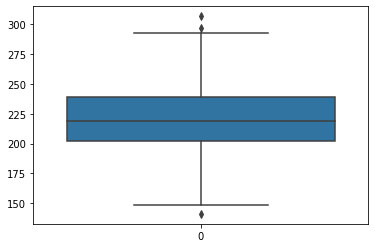

In [ ]:
# Boxplot
sns.boxplot(data = df.nota_saeb_matematica)

In [ ]:
# Limites a partir do intervalo interquartílico
q1 = df.nota_saeb_matematica.quantile(0.25)
q3 = df.nota_saeb_matematica.quantile(0.75)
IQ = q3 - q1
lim_sup = q3 + 1.5 * IQ
lim_inf = q1 - 1.5 * IQ

In [ ]:
# Recorte do Dataframe para compreender os outliers
outlier = df[(df.indicador_rendimento < lim_inf) | (df.indicador_rendimento > lim_sup)]
outlier

,ano,sigla_uf,id_municipio,id_escola,rede,ensino,anos_escolares,taxa_aprovacao,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb,projecao
0,2019,SP,3538709,35021180,estadual,fundamental,iniciais (1-5),99.2,0.991278,268.04,238.69,7.419320,7.4,7.3
1,2019,RS,4314050,43178286,municipal,fundamental,iniciais (1-5),92.1,0.913181,243.66,240.97,6.995325,6.4,6.7
2,2019,AP,1600154,16009088,municipal,fundamental,iniciais (1-5),88.5,0.888458,217.30,208.33,5.898999,5.2,4.5
3,2019,MS,5002951,50029053,estadual,fundamental,iniciais (1-5),94.9,0.948414,196.36,195.61,5.268299,5.0,4.9
4,2019,RO,1100809,11005050,estadual,fundamental,iniciais (1-5),93.1,0.931918,232.91,218.55,6.382536,5.9,5.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2019,PB,2504009,25075020,municipal,fundamental,iniciais (1-5),92.7,0.922232,228.47,210.83,6.157440,5.7,5.5
996,2019,MG,3162104,31324817,municipal,fundamental,iniciais (1-5),99.5,0.994898,238.80,217.63,6.478396,6.4,6.6
997,2019,SP,3540853,35209120,municipal,fundamental,iniciais (1-5),100.0,1.000000,222.16,188.35,5.628484,5.6,6.8
998,2019,CE,2303501,23254319,municipal,fundamental,iniciais (1-5),99.7,0.996141,230.44,207.38,6.132499,6.1,5.7


**SAEB Língua Portuguesa**

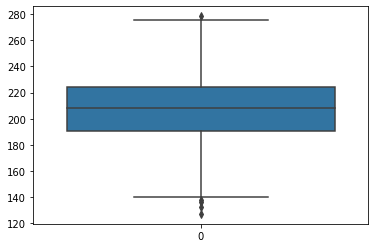

In [ ]:
# Boxplot
sns.boxplot(data= df.nota_saeb_lingua_portuguesa)

In [ ]:
# Limites a partir do intervalo interquartílico
q1 = df.nota_saeb_lingua_portuguesa.quantile(0.25)
q3 = df.nota_saeb_lingua_portuguesa.quantile(0.75)
IQ = q3 - q1
lim_sup = q3 + 1.5 * IQ
lim_inf = q1 - 1.5 * IQ

In [ ]:
# Recorte do Dataframe para compreender os outliers
outlier = df[(df.indicador_rendimento < lim_inf) | (df.indicador_rendimento > lim_sup)]
outlier

,ano,sigla_uf,id_municipio,id_escola,rede,ensino,anos_escolares,taxa_aprovacao,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb,projecao
0,2019,SP,3538709,35021180,estadual,fundamental,iniciais (1-5),99.2,0.991278,268.04,238.69,7.419320,7.4,7.3
1,2019,RS,4314050,43178286,municipal,fundamental,iniciais (1-5),92.1,0.913181,243.66,240.97,6.995325,6.4,6.7
2,2019,AP,1600154,16009088,municipal,fundamental,iniciais (1-5),88.5,0.888458,217.30,208.33,5.898999,5.2,4.5
3,2019,MS,5002951,50029053,estadual,fundamental,iniciais (1-5),94.9,0.948414,196.36,195.61,5.268299,5.0,4.9
4,2019,RO,1100809,11005050,estadual,fundamental,iniciais (1-5),93.1,0.931918,232.91,218.55,6.382536,5.9,5.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2019,PB,2504009,25075020,municipal,fundamental,iniciais (1-5),92.7,0.922232,228.47,210.83,6.157440,5.7,5.5
996,2019,MG,3162104,31324817,municipal,fundamental,iniciais (1-5),99.5,0.994898,238.80,217.63,6.478396,6.4,6.6
997,2019,SP,3540853,35209120,municipal,fundamental,iniciais (1-5),100.0,1.000000,222.16,188.35,5.628484,5.6,6.8
998,2019,CE,2303501,23254319,municipal,fundamental,iniciais (1-5),99.7,0.996141,230.44,207.38,6.132499,6.1,5.7


**SAEB Média Padronizada**

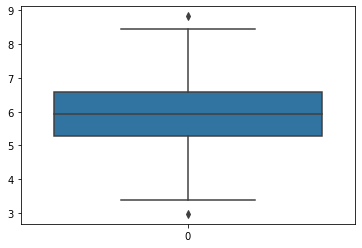

In [ ]:
# Boxplot
sns.boxplot(data= df.nota_saeb_media_padronizada)

In [ ]:
# Limites a partir do intervalo interquartílico
q1 = df.nota_saeb_media_padronizada.quantile(0.25)
q3 = df.nota_saeb_media_padronizada.quantile(0.75)
IQ = q3 - q1
lim_sup = q3 + 1.5 * IQ
lim_inf = q1 - 1.5 * IQ

In [ ]:
# Recorte do Dataframe para compreender os outliers
outlier = df[(df.indicador_rendimento < lim_inf) | (df.indicador_rendimento > lim_sup)]
outlier

,ano,sigla_uf,id_municipio,id_escola,rede,ensino,anos_escolares,taxa_aprovacao,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb,projecao
0,2019,SP,3538709,35021180,estadual,fundamental,iniciais (1-5),99.2,0.991278,268.04,238.69,7.419320,7.4,7.3
1,2019,RS,4314050,43178286,municipal,fundamental,iniciais (1-5),92.1,0.913181,243.66,240.97,6.995325,6.4,6.7
2,2019,AP,1600154,16009088,municipal,fundamental,iniciais (1-5),88.5,0.888458,217.30,208.33,5.898999,5.2,4.5
3,2019,MS,5002951,50029053,estadual,fundamental,iniciais (1-5),94.9,0.948414,196.36,195.61,5.268299,5.0,4.9
4,2019,RO,1100809,11005050,estadual,fundamental,iniciais (1-5),93.1,0.931918,232.91,218.55,6.382536,5.9,5.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2019,PB,2504009,25075020,municipal,fundamental,iniciais (1-5),92.7,0.922232,228.47,210.83,6.157440,5.7,5.5
996,2019,MG,3162104,31324817,municipal,fundamental,iniciais (1-5),99.5,0.994898,238.80,217.63,6.478396,6.4,6.6
997,2019,SP,3540853,35209120,municipal,fundamental,iniciais (1-5),100.0,1.000000,222.16,188.35,5.628484,5.6,6.8
998,2019,CE,2303501,23254319,municipal,fundamental,iniciais (1-5),99.7,0.996141,230.44,207.38,6.132499,6.1,5.7


**IDEB**

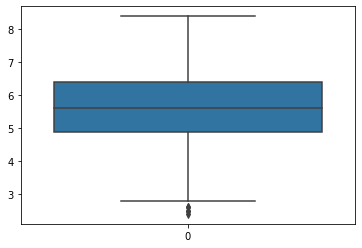

In [ ]:
# Boxplot
sns.boxplot(data= df.ideb)

In [ ]:
# Limites a partir do intervalo interquartílico
q1 = df.ideb.quantile(0.25)
q3 = df.ideb.quantile(0.75)
IQ = q3 - q1
lim_sup = q3 + 1.5 * IQ
lim_inf = q1 - 1.5 * IQ

In [ ]:
# Recorte do Dataframe para compreender os outliers
outlier = df[(df.indicador_rendimento < lim_inf) | (df.indicador_rendimento > lim_sup)]
outlier

,ano,sigla_uf,id_municipio,id_escola,rede,ensino,anos_escolares,taxa_aprovacao,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb,projecao
0,2019,SP,3538709,35021180,estadual,fundamental,iniciais (1-5),99.2,0.991278,268.04,238.69,7.419320,7.4,7.3
1,2019,RS,4314050,43178286,municipal,fundamental,iniciais (1-5),92.1,0.913181,243.66,240.97,6.995325,6.4,6.7
2,2019,AP,1600154,16009088,municipal,fundamental,iniciais (1-5),88.5,0.888458,217.30,208.33,5.898999,5.2,4.5
3,2019,MS,5002951,50029053,estadual,fundamental,iniciais (1-5),94.9,0.948414,196.36,195.61,5.268299,5.0,4.9
4,2019,RO,1100809,11005050,estadual,fundamental,iniciais (1-5),93.1,0.931918,232.91,218.55,6.382536,5.9,5.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2019,PB,2504009,25075020,municipal,fundamental,iniciais (1-5),92.7,0.922232,228.47,210.83,6.157440,5.7,5.5
996,2019,MG,3162104,31324817,municipal,fundamental,iniciais (1-5),99.5,0.994898,238.80,217.63,6.478396,6.4,6.6
997,2019,SP,3540853,35209120,municipal,fundamental,iniciais (1-5),100.0,1.000000,222.16,188.35,5.628484,5.6,6.8
998,2019,CE,2303501,23254319,municipal,fundamental,iniciais (1-5),99.7,0.996141,230.44,207.38,6.132499,6.1,5.7


# Pergunta Aberta

A partir das análises realizadas acima, escreva um breve parágrafo de conclusão que possa direcionar políticas públicas na área de educação. Fundamente suas conclusões com resultados da análise.

Sua Resposta:


# Distribuições Estatísticas

### Atividade 3: Para cada uma das variáveis analisadas acima, faça o histograma e calcule a simetria e a curtose, e a partir disto decida se a variável tem distribuição aproximadamente normal.

Taxa Aprovação

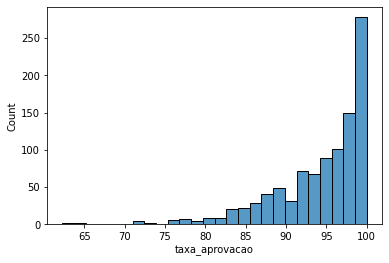

In [ ]:
# Histograma
sns.histplot(df.taxa_aprovacao)

In [ ]:
# Assimetria e Curtose
print(f"Assimetria {df.taxa_aprovacao.skew()}")
print(f"Curtose {df.taxa_aprovacao.kurtosis()}")

Assimetria -1.6508494472931874
Curtose 3.4937402754815365


Indicador Rendimento

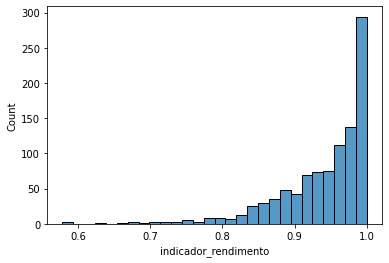

In [ ]:
# Histograma
sns.histplot(df.indicador_rendimento)

In [ ]:
# Assimetria e Curtose
print(f"Assimetria: {df.indicador_rendimento.skew()}")
print(f"Curtose: {df.indicador_rendimento.kurtosis()}")

Assimetria: -1.7439541382291999
Curtose: 4.172132094127088


Nota SAEB Matemática

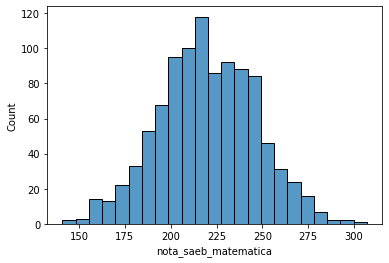

In [ ]:
# Histograma
sns.histplot(df.nota_saeb_matematica)

In [ ]:
# Assimetria e Curtose
print(f"Assimetria: {df.nota_saeb_matematica.skew()}")
print(f"Curtose: {df.nota_saeb_matematica.kurtosis()}")

Assimetria: 0.005291595988182504
Curtose: -0.1777892462618067


Nota SAEB Língua Portuguesa

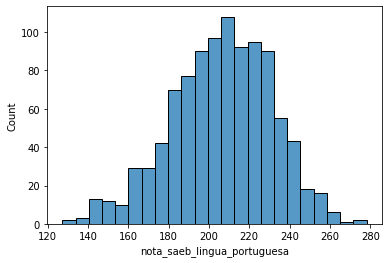

In [ ]:
# Histograma
sns.histplot(df.nota_saeb_lingua_portuguesa)

In [ ]:
# Assimetria e Curtose
print(f"Assimetria: {df.nota_saeb_lingua_portuguesa.skew()}")
print(f"Curtose: {df.nota_saeb_lingua_portuguesa.kurtosis()}")

Assimetria: -0.2768021844322887
Curtose: -0.051766411014606994


Nota SAEB Média Padronizada

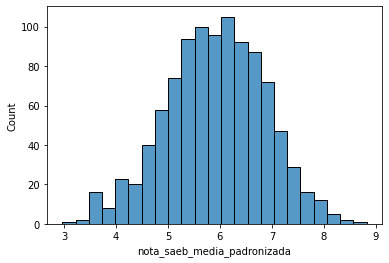

In [ ]:
# Histograma
sns.histplot(df.nota_saeb_media_padronizada)

In [ ]:
# Assimetria e Curtose
print(f"Assimetria: {df.nota_saeb_media_padronizada.skew()}")
print(f"Curtose: {df.nota_saeb_media_padronizada.kurtosis()}")

Assimetria: -0.14971001054422822
Curtose: -0.14954313884877957


IDEB

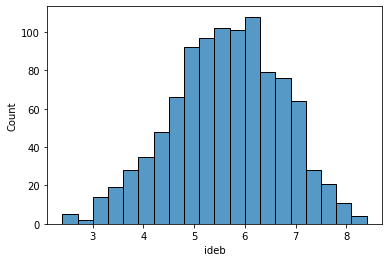

In [ ]:
# Histograma
sns.histplot(df.ideb)

In [ ]:
# Assimetria e Curtose
print(f"Assimetria: {df.ideb.skew()}")
print(f"Curtose: {df.ideb.kurtosis()}")

Assimetria: -0.21647647147023893
Curtose: -0.284169900208036


# Pergunta Aberta

Quais variáveis podemos afirmar que possui distribuição próxima da normal?

Resposta: nota_saeb_matematica

# Comparando Distribuições Estatísticas

Na biblioteca plotly, podemos plotar histogramas sobrepostos. Essa á uma excelente ferramenta para a comparação de distribuições. Simplesmente use o parâmetro color='coluna' na função px.histogram().

Exercício: compare a distribuição do IDEB entre os três estados da base filtrada (que usou para comparar as médias).

In [ ]:
# Código
px.histogram(df_filtrado.ideb, color=df_filtrado.sigla_uf)

# Calculando um Intervalo de Confiança para uma Estimativa de Média

A partir da fórmula do Intervalo de Confiança abaixo, estime dois intervalos de confiança para a média do IDEB: um com uma amostra aleatória de 1000 municípios (dataset que você já importou) e outro para uma amostra de no máximo 50 municípios. É sugerido usar o nível de 95% de confiança.

*Utilize a query abaixo no Google BigQuery alterando o valor após 'LIMIT' para definir a quantidade de municípios que quiser (menos de 50). Sugere-se baixar o arquivo .csv do BigQuery e utilizar no Google Colab/Deepnote.

Após calcular o intervalo de confiança, vá até o Google Big Query e calcule a verdadeira média do IDEB e verifique se ficou dentro do intervalo de confiança.

*Fique à vontade também para alterar o nível de confiança (valor Z) e ver o que acontece com o intervalo de confiança!

`SELECT * FROM basedosdados.br_inep_ideb.escola WHERE (ano=2019) AND nota_saeb_matematica IS NOT NULL AND anos_escolares = 'iniciais (1-5)' ORDER BY RAND() LIMIT 800;`

Utilize a Query abaixo para calcular a média populacional no Google BigQuery

`SELECT avg(***nomecoluna***) FROM basedosdados.br_inep_ideb.escola WHERE (ano=2019) AND nota_saeb_matematica IS NOT NULL AND anos_escolares = 'iniciais (1-5)' ORDER BY RAND();`

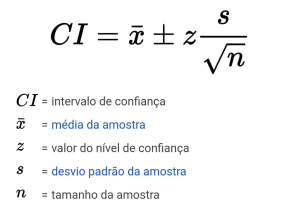

Parte 1: Amostra Grande (1000 municípios)



In [ ]:
df_ideb = pd.read_csv('ideb.csv')
df_ideb

In [51]:
# Calcular o valor de Z

import scipy.stats as st

taxa_erro = 0.05
z = st.norm.ppf(1-taxa_erro/2)

In [ ]:
# Calcular demais estatísticas da fórmula do IC e gerar o IC!

x = df_ideb['ideb'].mean()
s = df_ideb['ideb'].std()
n = len(df_ideb)

ic_sup = x + z * s/np.sqrt(n)
ic_inf = x - z * s/np.sqrt(n)

ic = pd.DataFrame([ic_inf, ic_sup, x])

ic

Parte 2: Amostra Pequena (menos de 50 municípios)

In [ ]:
# Importar novo DataFrame (amostra pequena)
df_50 = pd.read_csv('ideb_50.csv')
df_50

In [ ]:
# Calcular o valor de Z

import scipy.stats as st

taxa_erro = 0.05
z = st.norm.ppf(1-taxa_erro/2)

In [ ]:
# Calcular demais estatísticas da fórmula do IC e gerar o IC!

x = df_50['ideb'].mean()
s = df_50['ideb'].std()
n = len(df_50)

ic_sup = x + z * s/np.sqrt(n)
ic_inf = x - z * s/np.sqrt(n)

ic = pd.DataFrame([ic_inf, ic_sup, x])

ic